In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
rcParams['image.cmap'] = 'viridis'

# [1] (К теоретической задаче 1)

Сгенерируйте выборку $𝑋_{1}, ..., 𝑋_{𝑁}$ из равномерного распределения на отрезке [0,𝜃] для 𝑁 = 104. Для всех 𝑛 <= 𝑁 посчитайте оценки параметра 𝜃 из теоретической задачи: 

1) $2\bar{𝑋}$

2) $\bar{𝑋} + 𝑋_{(𝑛)}/2, $

3) $(𝑛 + 1)𝑋_{(1)},$

4) $ 𝑋_{(1)} + 𝑋_{(𝑛)}, $

5) $\frac{(𝑛+1)}{𝑛}𝑋(𝑛)$

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения 𝜃 в зависимости от 𝑛. Если некоторые оценки (при фиксированном значении 𝜃) сильно отличаются от истинного значения параметра 𝜃, то исключите их и постройте еще один график со всеми кривыми (для измененного значения 𝜃). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями. Какая оценка получилась лучше (в смысле упомянутого модуля разности при 𝑛 = 𝑁)? Проведите эксперимент для разных значений 𝜃 (количество графиков равно количеству значений 𝜃).

# Решение

In [6]:
def plot_theta(theta, N=104):
    X = np.random.uniform(low=0, high=theta, size=N)
    x_range = list(range(1, N+1))
    g1 = [np.abs(theta - 2*np.mean(X[:n])) for n in x_range]
    g2 = [np.abs(theta - (np.mean(X[:n]) + 0.5*np.max(X[:n]))) for n in x_range]
    g3 = [np.abs(theta - (n+1)*np.min(X[:n])) for n in x_range]
    g4 = [np.abs(theta - np.min(X[:n])-np.max(X[:n])) for n in x_range]
    g5 = [np.abs(theta - np.max(X[:n])*(n+1)/n) for n in x_range]
    
    plt.figure(figsize=(15,6))
    plt.plot(x_range, g1, 'go-', label='g1', alpha = 0.6)
    plt.plot(x_range, g2, 'bo-', label='g2', alpha = 0.6)
    plt.plot(x_range, g3, 'ro-', label='g3', alpha = 0.6)
    plt.plot(x_range, g4, 'yo-', label='g4', alpha = 0.6)
    plt.plot(x_range, g5, 'co-', label='g5', alpha = 0.6)
    plt.xlabel("n")
    plt.ylabel('Значение |theta - оценка|')
    plt.title("Динамика сходимости оценок для theta={}".format(theta), {'fontsize': 15})
    plt.legend()
    plt.show()

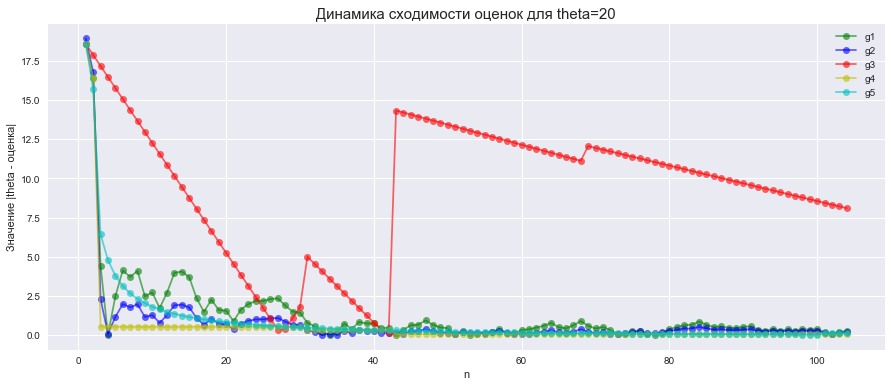

In [7]:
plot_theta(theta=20)

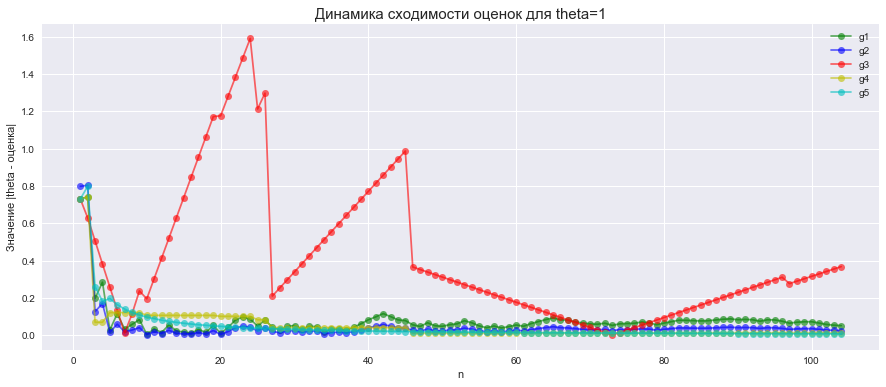

In [8]:
plot_theta(theta=1)

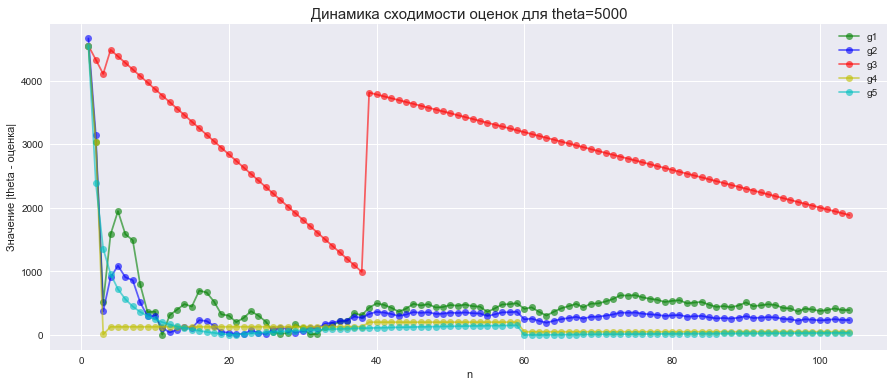

In [9]:
plot_theta(theta=5000)

### Вывод:
Кажется наилучшей оценкой вышла оценка (5), судя по графикам.

Оценка (3) наихудшая; это подтверждается теоретически -- оценка не является состоятельной;

# [2] (К теоретической задаче 5)

Сгенерируйте выборку $𝑋_1, ..., 𝑋_𝑁$ из экспоненциального распределения с параметром 𝜃 = 1 для 𝑁 = 104. 

Для всех 𝑛 <=𝑁 посчитайте оценку $(k!/\bar{X^k})^{1/k}$ параметра 𝜃.

Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком 𝑘 оценка ведет себя лучше (рассмотрите не менее 10 различных значений 𝑘).


# Решение

Функция плотности вероятности, использующаяся в реализации numpy для экспоненциального распределения:

$$f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$$

In [10]:
## Беспощадно стащенная с хабра быстрая реализация факториала,
## чтобы мой маленький ноутбук не умер от возможных больших вычислений
## link: https://habrahabr.ru/post/255761/#comment_8379739

def bin_pow_factorial(n):
    def eratosthenes(N):
        simp = [2]
        nonsimp = set()
        for i in range(3, N + 1, 2):
            if i not in nonsimp:
                nonsimp |= {j for j in range(i * i, N + 1, 2 * i)}
                simp.append(i)
        return simp
    def calc_pow_in_factorial(a, b):
        res = 0
        while a:
            a //= b
            res += a
        return res
    fact_pows = [(x, calc_pow_in_factorial(n, x)) for x in reversed(eratosthenes(n+1))]
    if len(fact_pows) % 2 == 1:
        fact_pows.append((1, 1))
    mul = [fact_pows[i][0] ** fact_pows[i][1] * fact_pows[-i-1][0] ** fact_pows[-i-1][1] for i in range(len(fact_pows)//2)]
    while len(mul) > 1:
        if len(mul) % 2 == 1:
            mul.append(1)
        mul = [mul[i] * mul[-i-1] for i in range(len(mul)//2)]
    return mul[0]

In [11]:
N=104    
def exp_plot(k_list, theta=1):
    
    X = np.random.exponential(scale=1, size=N)
    
    def estim_theta(k, data):
        data=np.array(data)
        k_fact = bin_pow_factorial(k)
        return np.abs((k_fact/np.mean(data**k))**(1.0/k) - theta)
    
    dict_res = {}
    x_range = list(range(1,N+1))
    for k in k_list:
        estim = [estim_theta(k, X[:n]) for n in x_range]
        dict_res[k] = estim
        
    res_df = pd.DataFrame(dict_res, index=x_range)
    
    res_df.plot(figsize=(15,8), fontsize=13, colormap='viridis')
    plt.xlabel("n from 1 to N=104", fontsize=14)
    plt.ylabel("|delta(theta - оценка)|", fontsize=14)
    plt.title('Сходимость оценки theta при различных параметрах k', fontsize=14)
    plt.show()
    return res_df

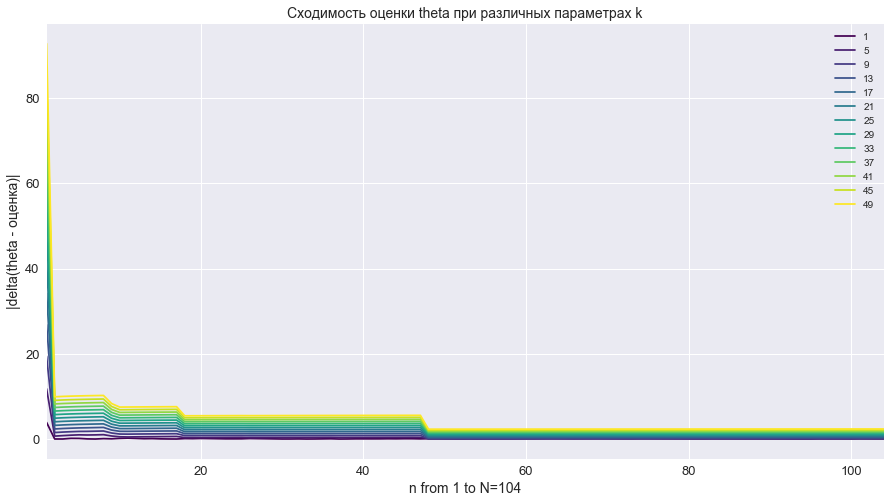

In [13]:
df = exp_plot(range(1,50,4))

### Вывод:
По градиенту на графике видно, что наиболее хорошие оценки дают наименьшие параметры k.

# [3] (К теоретической задаче 5)

Придумайте распределение, у которого конечны первые четыре момента, а пятый — нет.

Сгенерируйте выборку $𝑋_1, ..., 𝑋_𝑁$ из этого распределения для 𝑁 = 104. 

Постройте график плотности, а также нанесите точки выборки на график (с нулевой 𝑦-координатой). Для всех 𝑛 <= 𝑁 посчитайте оценку 
$𝑠_2 = 𝑠_2(𝑋_1, . . . , 𝑋_𝑛)$ для дисперсии. 

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от 𝑛.

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии.

# Решение

Если 5-ый момент не конечен, это значит, что интеграл: $\int_{-\infty}^{+\infty} f(x)x^5 dx $ расходится,
где $f(x)$ -- плотность вероятности искомого распределения.

Под такие условия идеально подходит $f(x)=\frac{1}{x^6}$, т.к. интегралы для всех моментов кроме 5-ого будут сходится, а для 5-ого интеграл не сойдется, т.к. ряд $\frac{1}{x}$ расходится.

Для данной задачи идеально подходит распределение Парето, которое в общем виде выглядит так:
$$p(x) = \frac{am^a}{x^{a+1}}$$

* a = 5
* m = 1, тогда для всех x>=m:
$$p(x) = \frac{5}{x^{6}}$$
а для остальных x:  $p(x)=0$

In [21]:
from scipy import stats
N = 104

class my_dist(stats.rv_continuous):
    def _pdf(self, x):
        if x>=1:
            return 5.0/(x**6)
        else:
            return 0

distribution = my_dist()

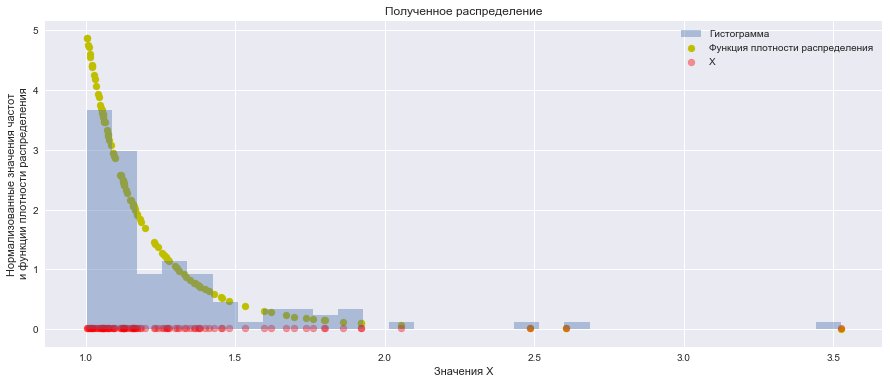

In [22]:
### Hарисуем функцию распределения, гистограмму с точечками ###

N = 104
X = [distribution.rvs() for i in range(N)]
plt.hist(X, label='Гистограмма', alpha=0.4, bins=30, normed=True)
x_tmp = list(set(X))
plt.scatter(x_tmp, [5.0/(x**6) for x in x_tmp], label='Функция плотности распределения', c='y')
plt.scatter(X, [0.01]*len(X), label='X', c='r', alpha=0.4)
plt.legend()
plt.title("Полученное распределение")
plt.xlabel("Значения X")
plt.ylabel("Нормализованные значения частот\n и функции плотности распределения")
plt.show()

Истинное значение дисперсии для такого распределения задается формулой:
$D = (\frac{m}{a-1})^{2}\frac{a}{a-2}$, откуда $D = \frac{5}{16 * 3}$

В качестве оценки используем $S_2:$

$$S_2(X_1,...,X_n) = \frac{1}{n}\sum_{i=1}^{n}(X_i - \bar{X})^2$$



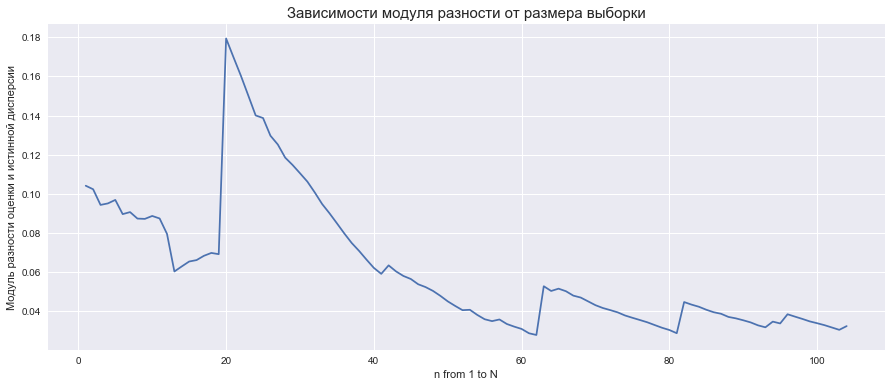

In [23]:
## можно было бы использовать и встроенную функцию np.var,
## но я написала свою для наглядности
def variance(data):
    data = np.array(data)
    return np.mean((data-np.mean(data))**2)

true_variance = 5.0/(16*3)
deltas = [np.abs(variance(X[:n])-true_variance) for n in range(1, N+1)]
plt.plot(range(1, N+1), deltas)
plt.xlabel("n from 1 to N")
plt.ylabel("Модуль разности оценки и истинной дисперсии")
plt.title("Зависимости модуля разности от размера выборки", fontsize=15)
plt.show()

### Проведем аналогичное исследование для выборки из стандартного распределения Коши:

$$P(x) = \frac{1}{\pi \bigl[ 1+
          x^2 \bigr] }$$
          

Размер выборки: 104
Медиана: -0.175784094222


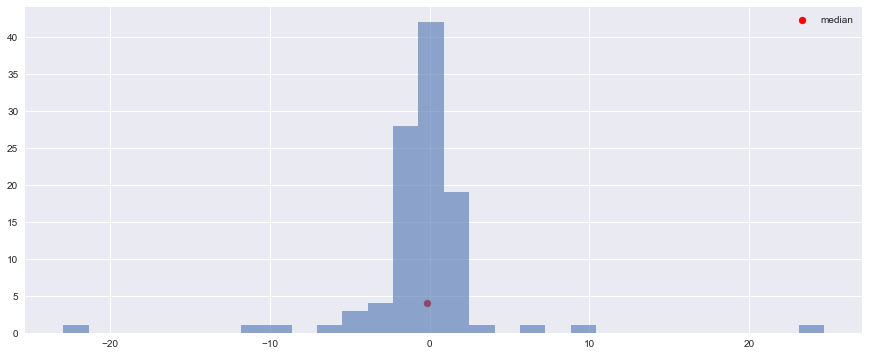

In [17]:
cauchy = np.random.standard_cauchy(size=104)
# cauchy = [stats.cauchy.rvs() for i in range(104)]
print("Размер выборки:", len(cauchy))
print("Медиана:", np.median(cauchy))
plt.hist(cauchy, bins=30, alpha=0.6)
plt.scatter(x=np.median(cauchy), y=4, c='r', label='median')
plt.legend()
plt.show()

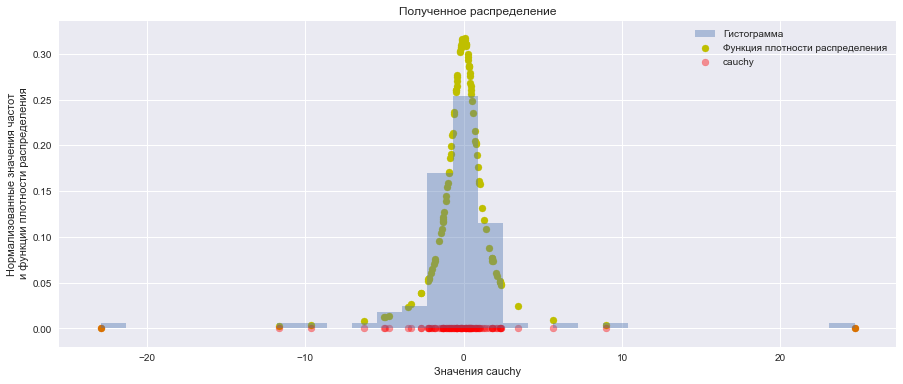

In [18]:
plt.hist(cauchy, label='Гистограмма', alpha=0.4, bins=30, normed=True)
x_tmp = list(set(cauchy))
prob = [stats.cauchy.pdf(x) for x in x_tmp]
plt.scatter(x_tmp, prob, label='Функция плотности распределения', c='y')
plt.scatter(cauchy, [0]*len(cauchy), label='cauchy', c='r', alpha=0.4)
plt.legend()
plt.title("Полученное распределение")
plt.xlabel("Значения cauchy")
plt.ylabel("Нормализованные значения частот\n и функции плотности распределения")
plt.show()

И наконец график оценки дисперсии для распределения Коши:

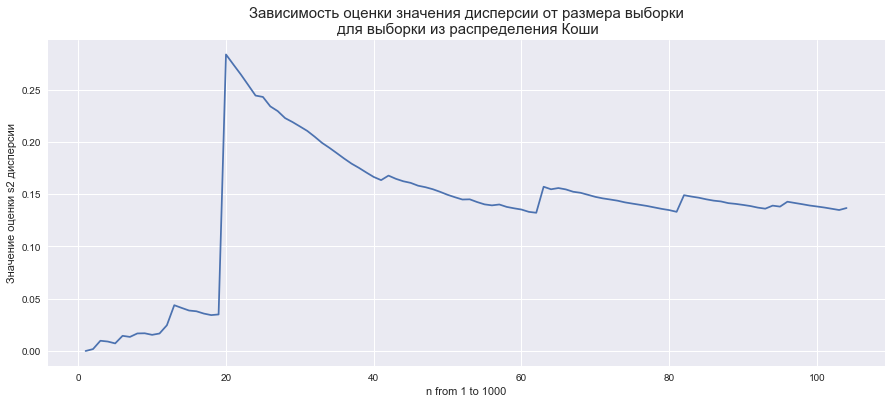

In [24]:
N1 = len(cauchy)
deltas = [variance(X[:n]) for n in range(1, N1+1)]
plt.plot(range(1, N1+1), deltas)
plt.xlabel("n from 1 to 1000")
plt.ylabel("Значение оценки s2 дисперсии")
plt.title("Зависимость оценки значения дисперсии от размера выборки\n для выборки из распределения Коши", fontsize=15)
plt.show()

# [4] (...)

Сгенерируйте выборку $𝑋_1 , ..., 𝑋_𝑁$ из стандартного нормального распределения для
$𝑁 = 104$.

Для всех 𝑛<=𝑁 посчитайте по ней эмпирическую функцию распределения.

Для некоторых 𝑛 (например, 𝑛 ∈ {10, 25, 50, 100, 1000, 𝑁 }) постройте графики эмпирической функции распределения 

(отметьте на оси абсцисс точки “скачков” кривых, нанеся каждую из “подвыборок” на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности 0.2), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различных значений 𝑛)

In [291]:
def empirical_dist_func(data):
    N = len(data)
    ## making variation series
    srt = np.argsort(data) # сортируем от min к max
    srt_dict = {data[i]:j for j,i in enumerate(srt)}
    res = []
    for i in data:
        k = srt_dict[i] # место данного значения в вариационном ряду
        if k>0:
            t = srt[k-1] # индекс ближайшего меньшего или равного соседа в data
            while data[t]==i: # двигаемся назад по вариационному ряду пока не встретим значение, меньшее i
                k-=1
                t = srt[k-1]
        res.append(k/N)
    return res

In [342]:
def plot_emp_dist(n):
    X = np.random.normal(size=n)
    tmp = empirical_dist_func(X)
    plt.scatter(X, [0]*len(tmp), c='r', alpha=0.2, label='Точки')
    sns.tsplot(tmp, X, alpha=0.3, condition='empirical cdf')
    sns.tsplot([stats.norm.cdf(x) for x in X], X, color='y', condition='true cdf')
    plt.legend(fontsize = 13)
    plt.show()

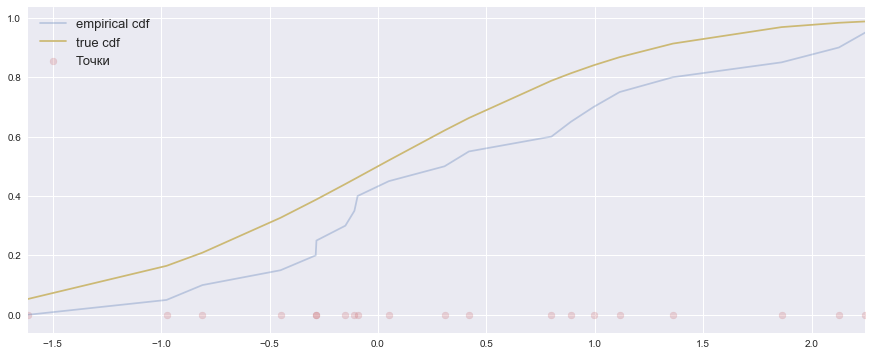

In [343]:
plot_emp_dist(20)

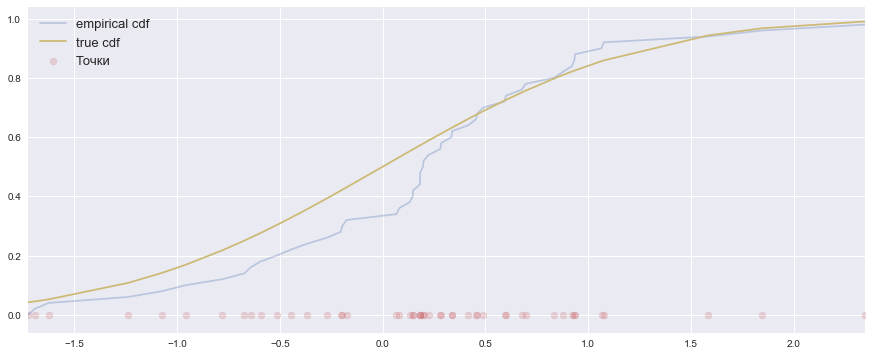

In [344]:
plot_emp_dist(50)

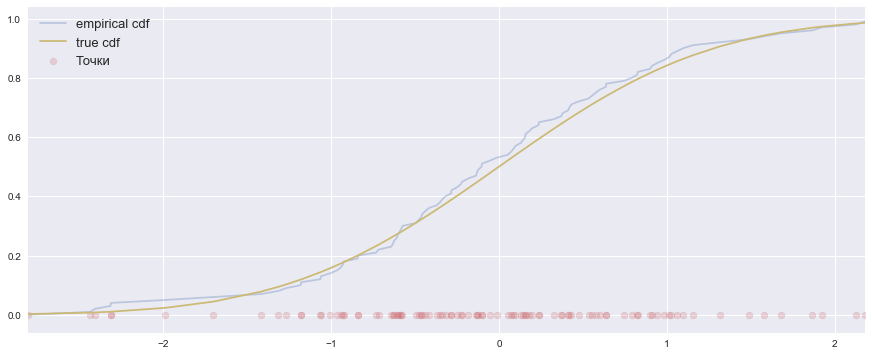

In [345]:
plot_emp_dist(100)

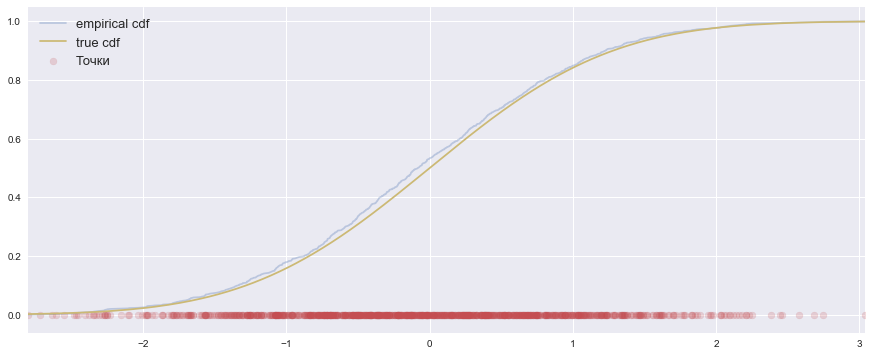

In [346]:
plot_emp_dist(1000)